In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (12, 8)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [4]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [7]:
df = pd.read_csv('Merge5.csv')
df.dtypes

Account Number         object
date_comm               int64
month_comm              int64
Year_comm             float64
date_ew               float64
month_ew              float64
Year_ew               float64
Address                object
Scheme                 object
Staus                  object
Gender                 object
Zone                   object
Eqipsale               object
Age                   float64
Equipment Warranty     object
Salslab                 int64
profinfo                int64
agehome                 int64
Churn                   int64
Sum                   float64
Jan_pay               float64
Feb_pay               float64
Mar_pay               float64
cardone                 int64
cardtwo                 int64
paper                   int64
used_time_hours       float64
Use_post_limit          int64
data_used_gb          float64
Jan_usepa               int64
                       ...   
Feb_postlimit           int64
Mar_postlimit           int64
ILPS_Other

In [19]:
df.head(2)

,Account Number,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Churn,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,used_time_hours,Use_post_limit,data_used_gb,Jan_usepa,Feb_usepa,Mar_usepa,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def,log_data_gb,log_Jan_gb,log_Feb_gb,log_Mar_gb,Year_diff,month
0,M1,4,11,2011.0,3.0,4.0,2015.0,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5,0,17,0,3629.430,1209.810,1209.810,1209.810,0,3,0,2015.00,0,263.25,1,1,1,717.90,662.42,634.68,43.8,110.35,109.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.576896,3.802208,4.712678,4.701389,4.0,7.0
1,M2,28,11,2011.0,3.0,4.0,2015.0,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7,0,22,0,2255.085,751.695,751.695,751.695,0,3,0,1844.29,5,272.80,1,1,1,696.12,652.40,495.77,98.4,70.90,103.5,5,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,6,-999.0,-999.0,-999.0,-999.0,5.612398,4.599152,4.275276,4.649187,4.0,7.0


In [9]:
df['Year_diff']= df['Year_ew']-df['Year_comm']

In [14]:
df['month']=df['month_comm']-df['month_ew']

In [18]:
a =  pd.get_dummies(df['Year_diff'],prefix='year_diff_')
b =  pd.get_dummies(df['month'],prefix='month_diff_')

In [20]:
train = pd.concat([df,a,b],axis=1)
train.head()

,Account Number,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Churn,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,used_time_hours,Use_post_limit,data_used_gb,Jan_usepa,Feb_usepa,Mar_usepa,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def,log_data_gb,log_Jan_gb,log_Feb_gb,log_Mar_gb,Year_diff,month,year_diff__0.0,year_diff__1.0,year_diff__2.0,year_diff__3.0,year_diff__4.0,year_diff__5.0,month_diff__-11.0,month_diff__-10.0,month_diff__-7.0,month_diff__-6.0,month_diff__-5.0,month_diff__-4.0,month_diff__-3.0,month_diff__-2.0,month_diff__-1.0,month_diff__0.0,month_diff__1.0,month_diff__2.0,month_diff__3.0,month_diff__4.0,month_diff__5.0,month_diff__6.0,month_diff__7.0,month_diff__8.0,month_diff__9.0,month_diff__10.0,month_diff__11.0
0,M1,4,11,2011.0,3.0,4.0,2015.0,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5,0,17,0,3629.430,1209.810,1209.810,1209.810,0,3,0,2015.00,0,263.25,1,1,1,717.90,662.42,634.68,43.80,110.35,109.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.576896,3.802208,4.712678,4.701389,4.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,M2,28,11,2011.0,3.0,4.0,2015.0,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7,0,22,0,2255.085,751.695,751.695,751.695,0,3,0,1844.29,5,272.80,1,1,1,696.12,652.40,495.77,98.40,70.90,103.5,5,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,6,-999.0,-999.0,-999.0,-999.0,5.612398,4.599152,4.275276,4.649187,4.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,M3,6,12,2011.0,3.0,4.0,2016.0,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1,5,17,0,3193.155,1064.385,1064.385,1064.385,0,3,0,2012.82,0,194.85,1,1,1,737.62,531.47,743.73,69.85,49.90,75.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.277349,4.260565,3.929863,4.332048,5.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,M4,28,10,2011.0,3.0,4.0,2015.0,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6,14,22,0,4126.500,963.375,1674.750,1488.375,0,3,0,2010.53,0,172.00,1,1,1,743.23,669.10,598.20,58.70,56.70,56.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.153292,4.089332,4.055257,4.053523,4.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,M5,18,1,2015.0,3.0,1.0,2016.0,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4,0,12,0,2616.180,839.895,919.590,856.695,0,3,0,1293.18,0,17.60,1,1,1,285.52,409.43,598.23,12.50,3.70,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-999.0,-999.0,-999.0,-999.0,2.923162,2.602690,1.547563,0.875469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
del train['year_diff__0.0']
del train['year_diff__1.0']
del train['year_diff__4.0']
del train['year_diff__5.0']

In [78]:
train.head(50)

,Account Number,month_ew,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Churn,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,used_time_hours,Use_post_limit,data_used_gb,Jan_usepa,Feb_usepa,Mar_usepa,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def,log_data_gb,log_Jan_gb,log_Feb_gb,log_Mar_gb,year_diff__2.0,year_diff__3.0,month_diff__0.0,month3
0,M1,4.0,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5,0,17,0,3629.430000,1209.810000,1209.810000,1209.810000,0,3,0,2015.00,0,263.25,1,1,1,717.90,662.42,634.68,43.80,110.35,109.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.576896,3.802208,4.712678,4.701389,0.0,0.0,0.0,0
1,M2,4.0,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7,0,22,0,2255.085000,751.695000,751.695000,751.695000,0,3,0,1844.29,5,272.80,1,1,1,696.12,652.40,495.77,98.40,70.90,103.50,5,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,6,-999.0,-999.0,-999.0,-999.0,5.612398,4.599152,4.275276,4.649187,0.0,0.0,0.0,0
2,M3,4.0,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1,5,17,0,3193.155000,1064.385000,1064.385000,1064.385000,0,3,0,2012.82,0,194.85,1,1,1,737.62,531.47,743.73,69.85,49.90,75.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.277349,4.260565,3.929863,4.332048,0.0,0.0,0.0,0
3,M4,4.0,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6,14,22,0,4126.500000,963.375000,1674.750000,1488.375000,0,3,0,2010.53,0,172.00,1,1,1,743.23,669.10,598.20,58.70,56.70,56.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.153292,4.089332,4.055257,4.053523,0.0,0.0,0.0,0
4,M5,1.0,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4,0,12,0,2616.180000,839.895000,919.590000,856.695000,0,3,0,1293.18,0,17.60,1,1,1,285.52,409.43,598.23,12.50,3.70,1.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-999.0,-999.0,-999.0,-999.0,2.923162,2.602690,1.547563,0.875469,0.0,0.0,1.0,0
5,M6,9.0,VALID,KLA,Open,other,Eastern,BOUGHT,46.0,Three Full Years,4,0,12,0,3233.160000,1077.720000,0.000000,2155.440000,0,0,3,2182.69,36,404.55,1,1,1,743.95,696.02,742.72,293.55,66.75,44.25,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,6.005244,5.685449,4.215824,3.812203,1.0,0.0,1.0,0
6,M7,4.0,VALID,KLA,Open,other,Eastern,BOUGHT,46.0,Three Full Years,4,0,12,0,2519.685000,839.895000,839.895000,839.895000,3,0,0,1029.58,0,262.10,1,1,1,265.82,412.48,351.28,187.65,53.30,21.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.572534,5.239893,3.994524,3.097837,0.0,1.0,0.0,0
7,M8,3.0,VALID,PWM,Open,Female,Eastern,RENTED,49.0,Three Full Years,10,5,21,0,3506.895000,1168.965000,1168.965000,1168.965000,3,0,0,2147.63,0,435.05,1,1,1,742.98,695.72,708.93,167.85,141.65,125.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,6.077757,5.129011,4.960394,4.840637,0.0,0.0,0.0,0
8,M9,3.0,VALID,PWR,Open,Female,Eastern,RENTED,63.0,Three Full Years,6,5,17,0,1931.895000,643.965000,643.965000,643.965000,0,3,0,2142.04,0,231.40,1,1,1,741.13,691.68,709.23,57.65,90.45,83.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,5.448460,4.071588,4.515792,4.434382,0.0,0.0,0.0,0
9,M10,3.0,VALID,PWM,Open,Male,Western,RENTED,79.0,Three Full Years,5,14,17,0,3515.085000,1171.695000,1171.695000,1171.695000,0,3,0,1814.40,0,101.85,1,1,1,613.60,592.20,608.60,39.95,31.15,30.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,-999.0,4.633272,3.712352,3.470412,3.457893,0.0,0.0,0.0,0


In [24]:
del train['Year_diff']
del train['Year_comm']
del train['Year_ew']

In [26]:
del train['date_comm']
del train['date_ew']

In [27]:
del train['month_diff__-11.0']
del train['month_diff__-10.0']
del train['month_diff__-7.0']
del train['month_diff__-6.0']
del train['month_diff__-5.0']
del train['month_diff__-4.0']
del train['month_diff__-3.0']
del train['month_diff__-2.0']
del train['month_diff__-1.0']

del train['month_diff__1.0']
del train['month_diff__2.0']
del train['month_diff__3.0']
del train['month_diff__4.0']
del train['month_diff__5.0']
del train['month_diff__6.0']
del train['month_diff__7.0']
del train['month_diff__8.0']
del train['month_diff__9.0']
del train['month_diff__10.0']
del train['month_diff__11.0']

In [29]:
del train['month']


In [32]:
del train['month_comm']

In [53]:
#Creating Month 3 feature


In [56]:
df.groupby('Salslab').Churn.agg(['count','sum'])



,count,sum
Salslab,,
1,444,26
2,442,32
3,2042,96
4,3193,200
5,1368,57
6,1489,60
7,503,20
8,208,9
9,168,5


In [57]:
df2 = df.groupby('Salslab').Churn.agg(['count','sum'])


In [64]:
a = pd.read_csv("Book2.csv")


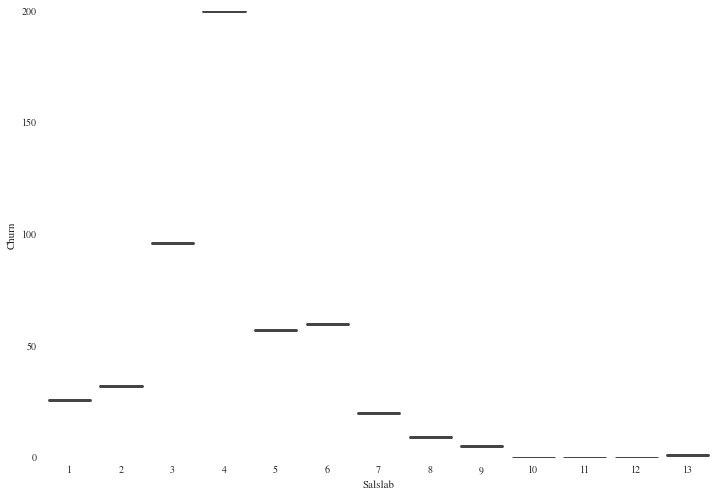

In [68]:
sns.boxplot(x="Salslab",y="Churn",data=a)

In [70]:
df.groupby('profinfo').Churn.agg(['count','sum'])


,count,sum
profinfo,,
0,7002,402
2,20,0
5,696,24
6,376,8
7,10,0
8,140,7
9,152,3
10,364,13
11,1,0


In [71]:
a = pd.read_csv("exl_B2.csv")


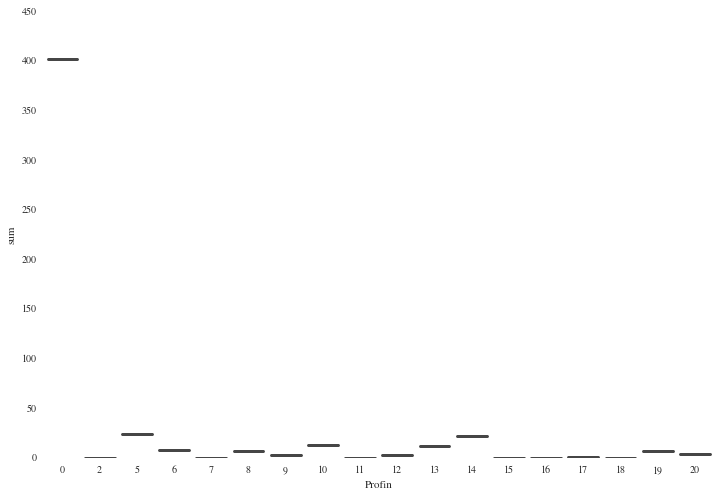

In [74]:
sns.boxplot(x="Profin",y="sum",data=a)

In [75]:
a = pd.read_csv("exl_b3.csv")


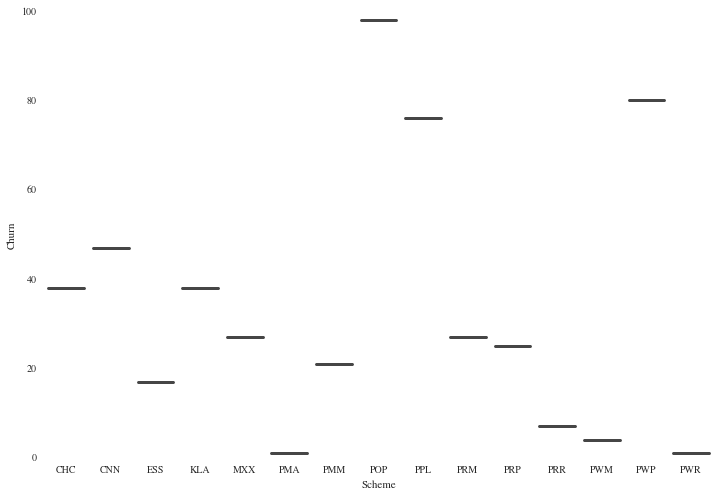

In [76]:
sns.boxplot(x="Scheme",y="Churn",data=a)

In [77]:
train.shape

(9963, 68)